# Отчет по практической работе аппроксимация методом наименьших квадратов

### Подготовил: Пацев В. В.
### Студент группы: Иэс-160п-18

Задание будем делать помощью языка Python инструмента [Jupyter Notebook](https://jupyter.org/)
и общедоступных библиотек с открытым кодом:
- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Scipy](https://www.scipy.org/)

Добавим библиотеки

In [163]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit


plt.close("all")

Подготовим данные и dataframe

In [108]:
data = [
    [1, 12.49], 
    [1.71, 4.76], 
    [2.42, 2.55], 
    [3.13, 1.60], 
    [3.84, 1.11], 
    [4.55, 0.82],
    [5.26, 0.63],
    [5.97, 0.50]]
df = pd.DataFrame.from_records(data, columns=('X', 'Y'))
df

,X,Y
0,1.00,12.49
1,1.71,4.76
2,2.42,2.55
3,3.13,1.60
4,3.84,1.11
5,4.55,0.82
6,5.26,0.63
7,5.97,0.50


Визуализируем известные точки

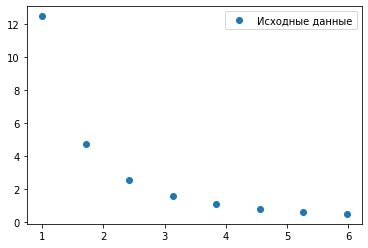

In [142]:
plt.plot(df['X'], df['Y'], 'o', label='Исходные данные')
plt.legend()
plt.show()

Подготовим функцию которая находит оптимальные параметры функции с помощью библиотеки [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) и визуализирует результат 

Так же расчитаем коэффициент детерминации по формуле:

$R^2 =1-\frac {\hat{\sigma}^2}{\hat{\sigma}^2_y}=1-\frac {SS_{res}/n}{SS_{tot}/n}=1-\frac {SS_{res}} {SS_{tot}},$

где $SS_{res}=\sum^n_{i=1}e^2_i=\sum^n_{i=1} (y_i-\hat y_i)^2$ — сумма квадратов остатков регрессии, $y_i,\hat y_i$ — фактические и расчётные значения объясняемой переменной.

$SS_{tot}=\sum^n_{i=1} (y_i-\overline y)^2=n \hat \sigma^2_y$ — общая сумма квадратов.

 

In [156]:
def get_solution(func, x, y):
    popt, pcov = curve_fit(func, x, y)

    plt.plot(x, y, 'o', label='Исходные данные')
    plt.plot(x,  func(x, *popt), 'r', label='Найденная функция')
    plt.legend()
    plt.show()

    ss_res = np.sum((y - func(x, *popt)) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    
    return  1 - (ss_res / ss_tot), popt

### Аппроксимация методом наименьших квадратов

#### Линейная функция

$
f(x, a, b) = a \cdot x + b
$

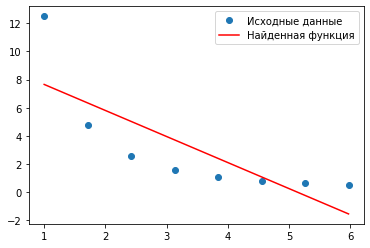

Коэффициент детерминации: 0.6266
Параметры функции: a = -1.849, b = 9.500


In [157]:
def func_1(x, a, b):
    return a * x + b

r1, popt1 = get_solution(func_1, df['X'], df['Y'])

print('Коэффициент детерминации: {0:.4f}'.format(r1))
print('Параметры функции: a = {0:.3f}, b = {1:.3f}'.format(*popt1))

#### Квадратичная функция

$
f(x, a, b, c) = a \cdot x^2 + b \cdot x + c
$

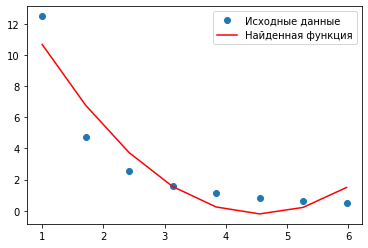

Коэффициент детерминации: 0.8987
Параметры функции: a = 0.858, b = -7.829, c = 17.650


In [158]:
def func_2(x, a, b, c):
    return a * (x) ** 2 + b * x + c

r2, popt2 = get_solution(func_2, df['X'], df['Y'])

print('Коэффициент детерминации: {0:.4f}'.format(r2))
print('Параметры функции: a = {0:.3f}, b = {1:.3f}, c = {2:.3f}'.format(*popt2))

#### Степенная функция

$
f(x, a, b) = a \cdot x^b
$

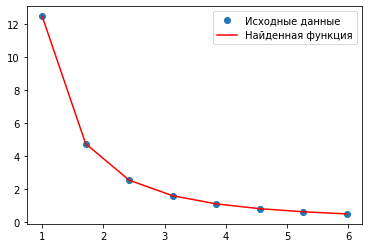

Коэффициент детерминации: 1.0000
Параметры функции: a = 12.490, b = -1.799


In [159]:
def func_3(x, a, b):
    return a * (x) ** b

r3, popt3 = get_solution(func_3, df['X'], df['Y'])

print('Коэффициент детерминации: {0:.4f}'.format(r3))
print('Параметры функции: a = {0:.3f}, b = {1:.3f}'.format(*popt3))

#### Показательная функция

$
f(x, a, b) = a\cdot e^{b \cdot x}
$

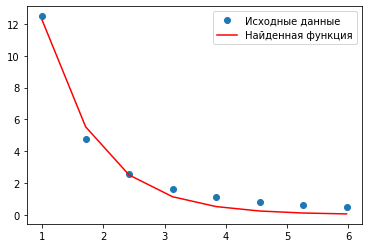

Коэффициент детерминации: 0.9821
Параметры функции: a = 37.499, b = -1.120


In [160]:
def func_4(x, a, b):
    return a * pow(math.e, x * b)

r4, popt4 = get_solution(func_4, df['X'], df['Y'])

print('Коэффициент детерминации: {0:.4f}'.format(r4))
print('Параметры функции: a = {0:.3f}, b = {1:.3f}'.format(*popt4))

#### Логарифмическая функция

$
f(x, a, b) = a \cdot \ln(x) + b
$

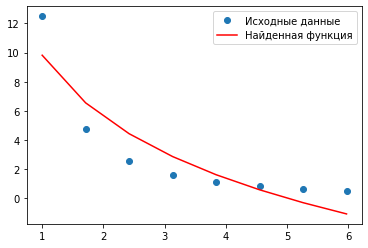

Коэффициент детерминации: 0.8344
Параметры функции: a = -6.096, b = 9.815


In [161]:
def func_5(x, a, b):
    return a * np.log(x) + b

r5, popt5 = get_solution(func_5, df['X'], df['Y'])

print('Коэффициент детерминации: {0:.4f}'.format(r5))
print('Параметры функции: a = {0:.3f}, b = {1:.3f}'.format(*popt5))

#### Гиперболическая функция

$
f(x, a, b) = a \cdot \frac{1}{x} + b
$

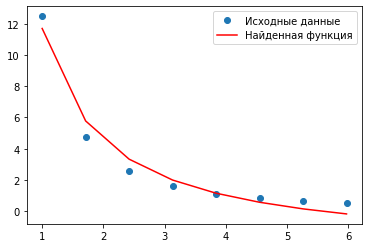

Коэффициент детерминации: 0.9725
Параметры функции: a = 14.282, b = -2.575


In [162]:
def func_6(x, a, b):
    return a/x + b

r6, popt6 = get_solution(func_6, df['X'], df['Y'])

print('Коэффициент детерминации: {0:.4f}'.format(r6))
print('Параметры функции: a = {0:.3f}, b = {1:.3f}'.format(*popt6))

### Вывод

Исходя их коэфициента детерминации лучше всего подходит cтепенная функция: 

$$f(x) = 12.49 \cdot x^{-1.799}$$